# Traditional Text Classification
---

This notebook will mainly deal with traditional ways to classify text data while putting special attention to the general text mining pipeline.

## Overview
---

- [Data](#Data)
- [Preprocessing](#Preprocessing)
    - [Tokenization](#Tokenization)
    - [Lemmatization](#Lemmatization)
    - [Removing Stop Words](#Removing-Stop-Words)
- [Vectorization](#Vectorization)
- [Modelling](#Modelling)
- [Evaluation & Interpretation](#Evaluation-&-Interpretation)

## Data
---

> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

For more general information on the dataset we are working with, visit [this webpage](http://qwone.com/~jason/20Newsgroups/).

In [1]:
# Fetching the corpus
from sklearn.datasets import fetch_20newsgroups

training_data = fetch_20newsgroups(subset='train')

testing_data = fetch_20newsgroups(subset='test')

As usual, we should first have a brief look at what we are working with. Let us get familiar with the dataset.

In [2]:
# Checking some data types
print(type(training_data))
print(type(training_data.data))

<class 'sklearn.utils._bunch.Bunch'>
<class 'list'>


In [3]:
# Checking target values
set(training_data.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [4]:
# Checking the target/category names
training_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Having a look at a single document
print(training_data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [6]:
# Checking the number of documents in the corpus
print(len(training_data.data))
print(len(testing_data.data))

11314
7532


## Preprocessing
---

Having gathered the corpus, it is now time to prepare the documents and terms for further use.

### Tokenization

To kick off the preprocessing pipeline, we first are going to tokenize the documents. While there are a few libraries you could use for these steps, here `nltk` is used.

In [7]:
# Using regular expression tokenizer
import nltk
from nltk.tokenize import RegexpTokenizer

In [8]:
# Tokenizing alphanumeric terms that are at least 2 characters long (and transforming them to lower-case tokens)
tokenizer = RegexpTokenizer(r'\b[^\d\W]{2,}\b')
train_tokens = tokenizer.tokenize(' '.join(training_data.data).lower())
test_tokens = tokenizer.tokenize(' '.join(testing_data.data).lower())

In [9]:
# Having a look at some tokens
train_tokens[100:115]

['you',
 'have',
 'on',
 'this',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'to',
 'you',
 'by']

### Lemmatization

Finding the non-inflected form for each token. By default, the `WordNetLemmatizer` from `nltk` POS-tags each token as a noun to apply lemmatization rules.

In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/ahafner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Creating lemmas using list comprehensions
lemmatizer = WordNetLemmatizer()
train_lemmas = [lemmatizer.lemmatize(token) for token in train_tokens]
test_lemmas = [lemmatizer.lemmatize(token) for token in test_tokens]

In [12]:
# Having a look at some lemmas
train_lemmas[100:115]

['you',
 'have',
 'on',
 'this',
 'funky',
 'looking',
 'car',
 'please',
 'mail',
 'thanks',
 'il',
 'brought',
 'to',
 'you',
 'by']

The results are actually rather mediocre at best. As you cen see, the verb "looking" is still present in its current form. To get the best results, it would be necessary to POS-tag each term correctly and extract the lemmas based on those POS-tags. For now, let us just make a minor adjustment and tag each token as *verb* (instead the default *noun* tag).

In [13]:
# Creating lemmas using list comprehensions - but POS-tagging 'v' instead
train_lemmas = [lemmatizer.lemmatize(token, pos='v') for token in train_tokens]
test_lemmas = [lemmatizer.lemmatize(token, pos='v') for token in test_tokens]
train_lemmas[100:115]

['you',
 'have',
 'on',
 'this',
 'funky',
 'look',
 'car',
 'please',
 'mail',
 'thank',
 'il',
 'bring',
 'to',
 'you',
 'by']

### Removing Stop Words

The last step in preparing the documents will be to remove stop words. Since the documents are written in English, it makes sense to remove English stop words only.

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahafner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Having a look at some stop words
sws = set(stopwords.words('english'))
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [16]:
# Removing English stop words using list comprehensions
train_lemmas = [lemma for lemma in train_lemmas if lemma not in sws]
test_lemmas = [lemma for lemma in test_lemmas if lemma not in sws]

In [17]:
# Checking out prepared terms
train_lemmas[100:115]

['washington',
 'edu',
 'fair',
 'number',
 'brave',
 'souls',
 'upgrade',
 'si',
 'clock',
 'oscillator',
 'share',
 'experience',
 'poll',
 'please',
 'send']

While the steps shown here are mainly adjusted for teaching purposes, in reality it would make sense to define a single function to preprocess a given text.

In [18]:
def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    lemmas = [lemma for lemma in lemmas if lemma not in sws]
    
    return lemmas

In [19]:
preprocess("My Bonnie is over the ocean; My Bonnie is over the sea; My Bonnie is over the ocean; Oh, bring back my Bonnie to me!")

['bonnie',
 'ocean',
 'bonnie',
 'sea',
 'bonnie',
 'ocean',
 'oh',
 'bring',
 'back',
 'bonnie']

## Vectorization
---

The lecture has discussed a variety of different vectorization approaches. Let us implement a simple **bag-of-words** approach to vectorize the newsgroup-corpus.

In [20]:
# Bag-of-words is a frequency-based approach that counts the occurrence of a term in a document
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=preprocess, token_pattern=None)

In [21]:
# Having a look what the CountVectorizer does
documents = ["This is a document.",
             "This is yet another document.",
             "Wow, how many documents can there possibly be? So many documents already!"]

bow = vectorizer.fit_transform(documents)

In [22]:
# Looking at the terms
vectorizer.get_feature_names_out()

array(['already', 'another', 'document', 'many', 'possibly', 'wow', 'yet'],
      dtype=object)

In [23]:
# Looking at the frequencies of each term for each document
bow.toarray()

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1],
       [1, 0, 2, 2, 1, 1, 0]])

As you can see, the bag-of-words model creates sparse vectors.

In [24]:
# Let us do the real thing now
X_train = vectorizer.fit_transform(training_data.data)
X_test = vectorizer.transform(testing_data.data)

In [25]:
# Checking the vocabulary size for the training data
len(vectorizer.get_feature_names_out())

76836

## Modelling
---

After preprocessing the text data, we can now apply our models for classification.
Let us use 2 different classifiers, one of which we have not yet worked with before:

* [Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
> The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Pay no attention to this
import warnings
warnings.filterwarnings('ignore') 

nb_classifier = MultinomialNB()
sv_classifier = LinearSVC()

In [27]:
# Training
nb_classifier.fit(X_train, training_data.target)
sv_classifier.fit(X_train, training_data.target)

LinearSVC()

In [28]:
# Making predictions
nb_predictions = nb_classifier.predict(X_test)
sv_predictions = sv_classifier.predict(X_test)

## Evaluation & Interpretation
---

The process of evaluating the classification results for text mining tasks is very similar to other types of data you have seen before.

In [29]:
# Having a look at model accuracy
print(f'LinearSVC Accuracy: {accuracy_score(sv_predictions, testing_data.target)}')
print(f'Naive Bayes Accuracy: {accuracy_score(nb_predictions, testing_data.target)}')

LinearSVC Accuracy: 0.7854487519915029
Naive Bayes Accuracy: 0.7989909718534254


In [30]:
# Having a look at the classification report
print(classification_report(testing_data.target, sv_predictions, target_names=testing_data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.71      0.72       319
           comp.graphics       0.67      0.71      0.69       389
 comp.os.ms-windows.misc       0.72      0.66      0.69       394
comp.sys.ibm.pc.hardware       0.61      0.70      0.65       392
   comp.sys.mac.hardware       0.72      0.77      0.74       385
          comp.windows.x       0.79      0.68      0.73       395
            misc.forsale       0.74      0.84      0.79       390
               rec.autos       0.83      0.84      0.84       396
         rec.motorcycles       0.91      0.91      0.91       398
      rec.sport.baseball       0.87      0.88      0.88       397
        rec.sport.hockey       0.92      0.94      0.93       399
               sci.crypt       0.88      0.90      0.89       396
         sci.electronics       0.70      0.70      0.70       393
                 sci.med       0.84      0.77      0.80       396
         

<Axes: >

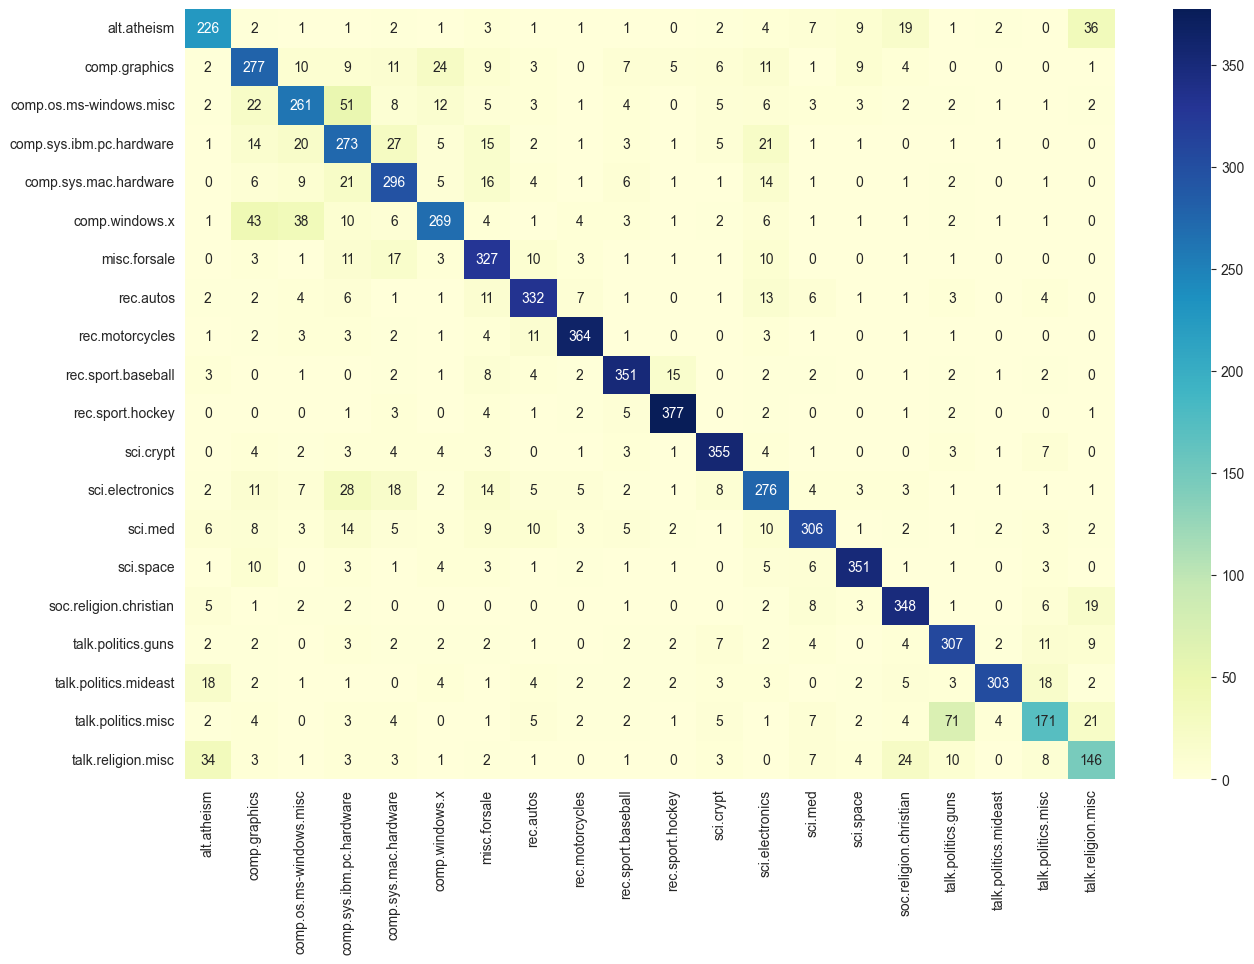

In [31]:
# Plotting a custom confusion matrix
import pandas as pd
import seaborn as sns ## -> pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline

cm = pd.DataFrame(confusion_matrix(testing_data.target, sv_predictions), index=testing_data.target_names, columns=testing_data.target_names)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d')